In [15]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

from typing import List
import pandas as pd
from datetime import datetime

In [16]:
# create fuzzy control system
# average temp = 38.3 - 39.2
body_temperature = ctrl.Antecedent(np.arange(34.0,44.0,0.1), "body_temperature")
# heart rate average 70 - 120
heart_rate = ctrl.Antecedent(np.arange(0,190,1), "heart_rate")
# barking lvl, highest bark 113.1 db
barking_volume = ctrl.Antecedent(np.arange(0,113,1), "barking_volume")
#time_of_day = ctrl.Antecedent(np.arange(0,24,0.25))

is_dog_ok = ctrl.Consequent(np.arange(0,100,1), "is_dog_ok")


In [3]:
#time_of_day['night'] = fuzz.

In [17]:
#define membership functions for body temperature
body_temperature['low'] = fuzz.trimf(body_temperature.universe, [34,34,38.75])
body_temperature['normal'] = fuzz.gaussmf(body_temperature.universe, mean = 38.75, sigma = 0.6)
body_temperature['high'] = fuzz.trimf(body_temperature.universe, [38.75,44,44])

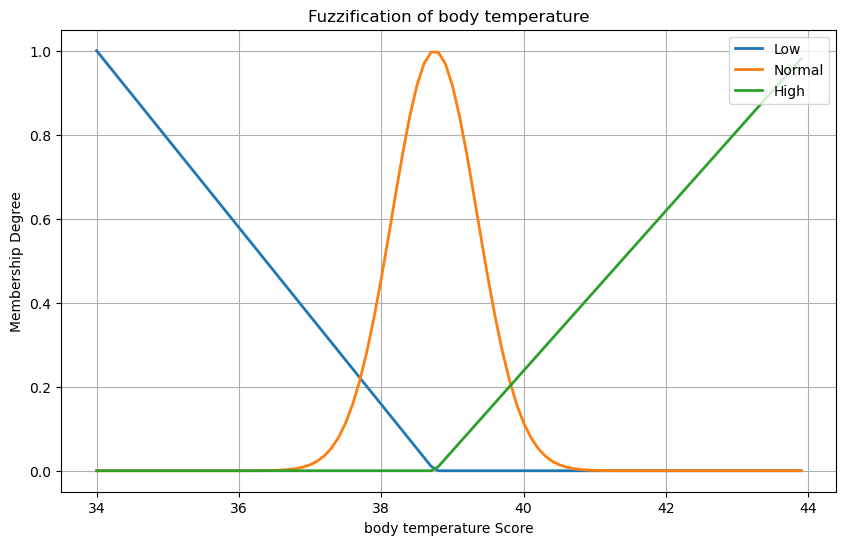

In [ ]:
# Define membership functions for "is dog ok?" categories
low = fuzz.trimf(body_temperature.universe, [34,34,38.75])
normal = fuzz.gaussmf(body_temperature.universe, mean = 38.75, sigma = 0.6)
high = fuzz.trimf(body_temperature.universe, [38.75,44,44])


# Plotting the membership functions
plt.figure(figsize=(10, 6))
plt.plot(body_temperature.universe, low, label='Low', linewidth=2)
plt.plot(body_temperature.universe, normal, label='Normal', linewidth=2)
plt.plot(body_temperature.universe, high, label='High', linewidth=2)

# Add titles and labels
plt.title("Fuzzification of body temperature")
plt.xlabel("body temperature Score")
plt.ylabel("Membership Degree")
plt.legend(loc="upper right")
plt.grid(True)
plt.show()

In [26]:
#define membership functions for heart rate
heart_rate['low'] = fuzz.gaussmf(heart_rate.universe, mean=0, sigma = 30)
heart_rate['normal'] = fuzz.gaussmf(heart_rate.universe, mean = 95, sigma = 40)
heart_rate['high'] = fuzz.gaussmf(heart_rate.universe, mean=190, sigma = 30)

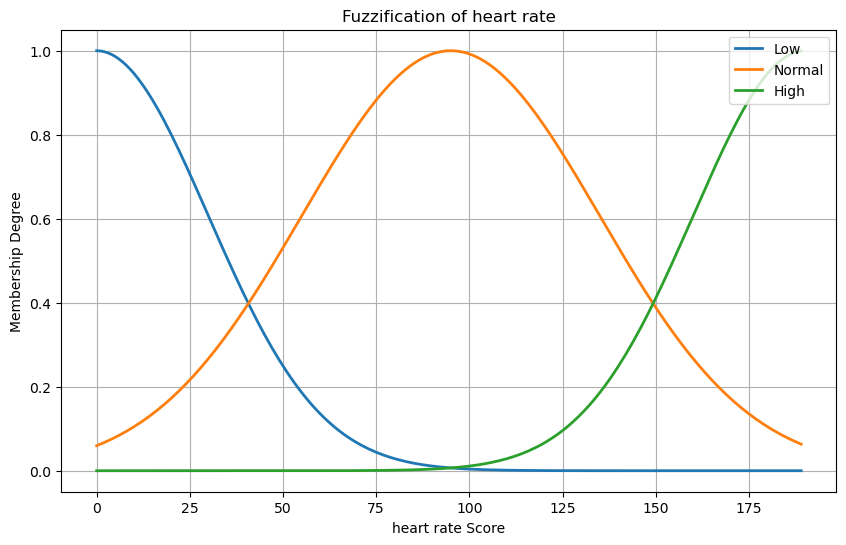

In [27]:
# Plotting the member function
low = fuzz.gaussmf(heart_rate.universe, mean=0, sigma = 30)
normal = fuzz.gaussmf(heart_rate.universe, mean = 95, sigma = 40)
high = fuzz.gaussmf(heart_rate.universe, mean=190, sigma = 30)

plt.figure(figsize=(10, 6))

plt.plot(heart_rate.universe, low, label='Low', linewidth=2)
plt.plot(heart_rate.universe, normal, label='Normal', linewidth=2)
plt.plot(heart_rate.universe, high, label='High', linewidth=2)

# Add titles and labels
plt.title("Fuzzification of heart rate")
plt.xlabel("heart rate Score")
plt.ylabel("Membership Degree")
plt.legend(loc="upper right")
plt.grid(True)
plt.show()

In [6]:
#define membership functions for barking
barking_volume['quiet'] = fuzz.gaussmf(barking_volume.universe, mean=0, sigma = 25)
barking_volume['moderate'] = fuzz.gaussmf(barking_volume.universe, mean=56.5, sigma = 20)
barking_volume['loud'] = fuzz.gaussmf(barking_volume.universe, mean=113, sigma = 25)

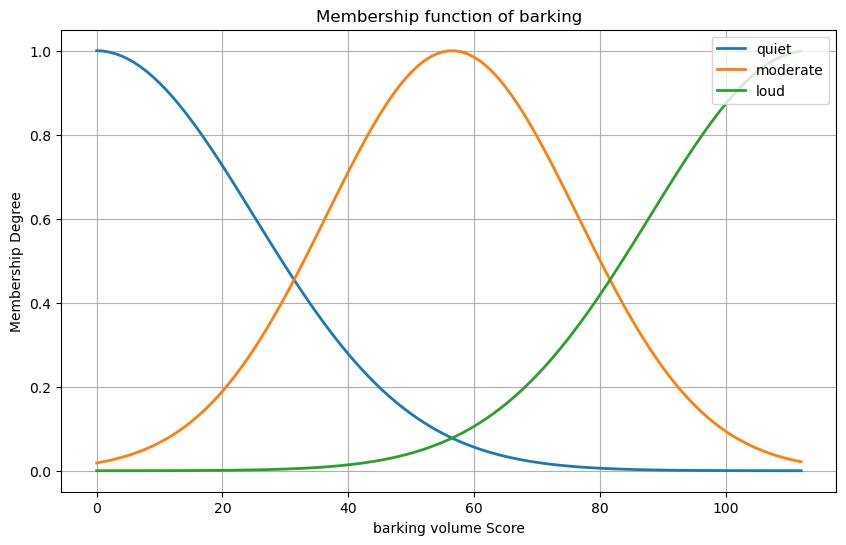

In [29]:
# Plotting the member function
quiet = fuzz.gaussmf(barking_volume.universe, mean=0, sigma = 25)
moderate = fuzz.gaussmf(barking_volume.universe, mean=56.5, sigma = 20)
loud = fuzz.gaussmf(barking_volume.universe, mean=113, sigma = 25)

plt.figure(figsize=(10, 6))

plt.plot(barking_volume.universe, quiet, label='quiet', linewidth=2)
plt.plot(barking_volume.universe, moderate, label='moderate', linewidth=2)
plt.plot(barking_volume.universe, loud, label='loud', linewidth=2)

# Add titles and labels
plt.title("Membership function of barking")
plt.xlabel("barking volume Score")
plt.ylabel("Membership Degree")
plt.legend(loc="upper right")
plt.grid(True)
plt.show()

In [7]:
is_dog_ok["perfect"] = fuzz.gaussmf(is_dog_ok.universe, mean=0, sigma = 15)
is_dog_ok["normal"] = fuzz.gbellmf(x = is_dog_ok.universe, a = 15, b = 4, c = 30)
is_dog_ok["need help"] = fuzz.gaussmf(is_dog_ok.universe, mean=70, sigma = 25)
is_dog_ok["urgent"] = fuzz.gaussmf(is_dog_ok.universe, mean=100, sigma = 10)

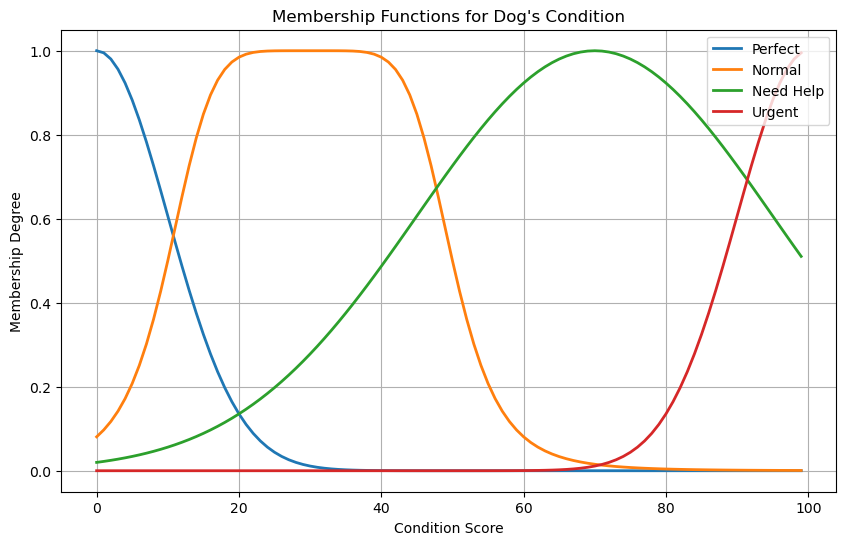

In [8]:
# Define the universe for "is dog ok?" variable
is_dog_ok_universe = np.arange(0, 100, 1)

# Define membership functions for "is dog ok?" categories
perfect_dog = fuzz.gaussmf(is_dog_ok_universe, mean=0, sigma=10)
normal_dog = fuzz.gbellmf(is_dog_ok_universe, a = 20, b = 3, c = 30)
need_help_dog = fuzz.gaussmf(is_dog_ok_universe, mean=70, sigma=25)
urgent_dog = fuzz.gaussmf(is_dog_ok_universe, mean=100, sigma=10)

# Plotting the membership functions
plt.figure(figsize=(10, 6))
plt.plot(is_dog_ok_universe, perfect_dog, label='Perfect', linewidth=2)
plt.plot(is_dog_ok_universe, normal_dog, label='Normal', linewidth=2)
plt.plot(is_dog_ok_universe, need_help_dog, label='Need Help', linewidth=2)
plt.plot(is_dog_ok_universe, urgent_dog, label='Urgent', linewidth=2)

# Add titles and labels
plt.title("Membership Functions for Dog's Condition")
plt.xlabel("Condition Score")
plt.ylabel("Membership Degree")
plt.legend(loc="upper right")
plt.grid(True)
plt.show()


In [9]:
#Define fuzzy rules
rule1 = ctrl.Rule(body_temperature['normal'] & heart_rate['normal'],is_dog_ok['perfect'])
rule2 = ctrl.Rule(body_temperature['high'] & heart_rate['high'],is_dog_ok['need help'])
rule3 = ctrl.Rule(body_temperature['low'] & heart_rate['low'],is_dog_ok['urgent'])

In [10]:

class Dog:
    def __init__(self, time, heart_rate, body_temperature,barking_volume ):
        self.time = time
        self.heart_rate = heart_rate
        self.body_temperature = body_temperature
        self.barking_volume = barking_volume
def data_process(file):
    dog_data_list = []

    
    datafile = pd.read_csv(file)
    
    # Loop through each row to create Dog objects
    for i in range(len(datafile)):
        # Extract each column directly
        time_str = datafile.loc[i, 'Time']
        heart_rate = datafile.loc[i, 'Heart Rate (bpm)']
        body_temp = datafile.loc[i, 'Body Temperature (°C)']
        barking = datafile.loc[i, 'Barking Volume (dB)']
        
        # Parse time as a datetime object in HH:MM format
        time = datetime.strptime(time_str, '%H:%M').time()
        
        # Create a Dog object and add it to the list
        dog = Dog(time, int(heart_rate), int(body_temp), int(barking))
        dog_data_list.append(dog)
        
    return dog_data_list

In [11]:
#file='Data/fine_dog_data.csv'
file='Data/sick_dog_data.csv'
dog_data_list = data_process(file)
#create a control system and simulation
system = ctrl.ControlSystem([rule1,rule2,rule3])


for i in dog_data_list:
# Input values
    sim = ctrl.ControlSystemSimulation(system)
    sim.input['body_temperature'] = i.body_temperature
    sim.input['heart_rate'] = i.heart_rate
    

# Compute the result
    sim.compute()

# Output the result
    print(  "time :" +str(i.time) + "output value: " + str(sim.output['is_dog_ok']))


time :00:00:00output value: 12.35433124687893
time :00:05:00output value: 12.406616017451602
time :00:10:00output value: 12.376096310979174
time :00:15:00output value: 12.294837150715365
time :00:20:00output value: 12.349142797068291
time :00:25:00output value: 12.32985318272534
time :00:30:00output value: 12.440634149904298
time :00:35:00output value: 12.376096310979174
time :00:40:00output value: 12.406616017451602
time :00:45:00output value: 12.35433124687893
time :00:50:00output value: 12.349142797068291
time :00:55:00output value: 12.479030421048694
time :01:00:00output value: 12.32502424802003
time :01:05:00output value: 12.35433124687893
time :01:10:00output value: 12.310027674506985
time :01:15:00output value: 12.376096310979174
time :01:20:00output value: 12.349142797068291
time :01:25:00output value: 12.35433124687893
time :01:30:00output value: 12.35433124687893
time :01:35:00output value: 12.479030421048694
time :01:40:00output value: 12.294837150715365
time :01:45:00output